In [1]:
import pandas as pd
import difflib 

import matplotlib.pyplot as plt
#import folium 

# Import dataset

In [2]:
!ls ..


analisi_dati_COVID	    big_data_exercise.ctb~~~
arianna_miola_homework.odt  COVID-19
big_data_exercise.ctb	    covid19-opendata-vaccini
big_data_exercise.ctb~	    Data-Analysis-of-Covid-19-using-Spark-
big_data_exercise.ctb~~


In [3]:
!ls ../covid19-opendata-vaccini/dati

anagrafica-vaccini-summary-latest.csv
anagrafica-vaccini-summary-latest.json
consegne-vaccini-latest.csv
consegne-vaccini-latest.json
last-update-dataset.json
platea.csv
platea-dose-addizionale-booster.csv
platea-dose-addizionale-booster.json
platea.json
punti-somministrazione-latest.csv
punti-somministrazione-latest.json
punti-somministrazione-tipologia.csv
punti-somministrazione-tipologia.json
soggetti-guariti.csv
soggetti-guariti.json
somministrazioni-vaccini-latest.csv
somministrazioni-vaccini-latest.json
somministrazioni-vaccini-summary-latest.csv
somministrazioni-vaccini-summary-latest.json
vaccini-summary-latest.csv
vaccini-summary-latest.json


In [4]:
!ls ../COVID-19/dati-statistici-riferimento

popolazione-istat-regione-range.csv  popolazione-over80.csv


In [5]:
folder_vaccini = "../covid19-opendata-vaccini/dati/"
folder_covid = "../COVID-19/"

In [6]:
df_platea = pd.read_csv(folder_vaccini+"platea.csv")
df_popolazione = pd.read_csv(folder_covid+"dati-statistici-riferimento/popolazione-istat-regione-range.csv")

In [46]:
df_platea['area'].unique()

array(['ABR', 'BAS', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG', 'LOM',
       'MAR', 'MOL', 'PAB', 'PAT', 'PIE', 'PUG', 'SAR', 'SIC', 'TOS',
       'UMB', 'VDA', 'VEN'], dtype=object)

In [47]:
df_popolazione.sigla_regione.unique()

array(['ABR', 'BAS', 'BOL', 'CAL', 'CAM', 'EMR', 'FVG', 'LAZ', 'LIG',
       'LOM', 'MAR', 'MOL', 'PIE', 'PUG', 'SAR', 'SIC', 'TOS', 'TRE',
       'UMB', 'VDA', 'VEN'], dtype=object)

# Rinomino le regioni sulla base "close match" con difflib

In [8]:
df_popolazione.loc[:, 'denominazione_regione'] = df_popolazione['denominazione_regione']\
                             .map(lambda x: difflib.get_close_matches(x, df_platea['nome_area'])[0])

In [9]:
set(df_popolazione['denominazione_regione']) ^ set(df_platea['nome_area'])

set()

# groupby per eliminare suddivisione per fasce di età

In [10]:
df_platea_tot = df_platea.groupby(["area", "nome_area"]).sum().reset_index()
df_platea_tot

,area,nome_area,totale_popolazione
0,ABR,Abruzzo,1265353
1,BAS,Basilicata,523836
2,CAL,Calabria,1803821
3,CAM,Campania,5481138
4,EMR,Emilia-Romagna,4266930
5,FVG,Friuli-Venezia Giulia,1154702
6,LAZ,Lazio,5522780
7,LIG,Liguria,1479768
8,LOM,Lombardia,9883969
9,MAR,Marche,1456240


In [11]:
df_popolazione

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
0,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,0-15,87423,82474,169897
1,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,16-19,24402,22349,46751
2,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,20-29,67472,62611,130083
3,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,30-39,76472,74241,150713
4,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,40-49,94745,95315,190060
...,...,...,...,...,...,...,...,...,...,...,...,...
205,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,50-59,399024,400436,799460
206,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,60-69,293238,309972,603210
207,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,70-79,228669,265774,494443
208,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,80-89,115439,177591,293030


In [12]:
df_popolazione_tot = df_popolazione.groupby(["codice_regione", "sigla_regione", "denominazione_regione"])[["totale_generale"]]\
                    .sum().reset_index()
df_popolazione_tot

,codice_regione,sigla_regione,denominazione_regione,totale_generale
0,1,PIE,Piemonte,4311217
1,2,VDA,Valle d'Aosta,125034
2,3,LOM,Lombardia,10027602
3,5,VEN,Veneto,4879133
4,6,FVG,Friuli-Venezia Giulia,1206216
5,7,LIG,Liguria,1524826
6,8,EMR,Emilia-Romagna,4464119
7,9,TOS,Toscana,3692555
8,10,UMB,Umbria,870165
9,11,MAR,Marche,1512672


# Verifica consistenza delle sigle regione tra i sue dataset  
problema: bolzano e trento

In [13]:
set(df_platea_tot['area']) - set(df_popolazione_tot['sigla_regione'])

{'PAB', 'PAT'}

In [14]:
set(df_popolazione_tot['sigla_regione']) - set(df_platea_tot['area'])

{'BOL', 'TRE'}

In [15]:
#Interferenza simmetrica (XOR)
set(df_popolazione_tot['sigla_regione']) ^ set(df_platea_tot['area'])

{'BOL', 'PAB', 'PAT', 'TRE'}

In [16]:
set(df_popolazione_tot['denominazione_regione']) ^ set(df_platea_tot['nome_area'])

set()

In [17]:
df_platea_tot

,area,nome_area,totale_popolazione
0,ABR,Abruzzo,1265353
1,BAS,Basilicata,523836
2,CAL,Calabria,1803821
3,CAM,Campania,5481138
4,EMR,Emilia-Romagna,4266930
5,FVG,Friuli-Venezia Giulia,1154702
6,LAZ,Lazio,5522780
7,LIG,Liguria,1479768
8,LOM,Lombardia,9883969
9,MAR,Marche,1456240


# Snellisco i dataset con solo quello che mi serve: 


In [18]:
df_popolazione_tot.columns

Index(['codice_regione', 'sigla_regione', 'denominazione_regione',
       'totale_generale'],
      dtype='object')

In [19]:
df_popolazione_def = df_popolazione_tot[['denominazione_regione', 'totale_generale']].set_index('denominazione_regione')
df_popolazione_def.rename(columns = {'totale_generale': 'totale_popolazione'}, inplace= True)
df_popolazione_def

,totale_popolazione
denominazione_regione,
Piemonte,4311217
Valle d'Aosta,125034
Lombardia,10027602
Veneto,4879133
Friuli-Venezia Giulia,1206216
Liguria,1524826
Emilia-Romagna,4464119
Toscana,3692555
Umbria,870165


In [20]:
df_platea_tot.columns

Index(['area', 'nome_area', 'totale_popolazione'], dtype='object')

In [21]:
df_platea_def = df_platea_tot[['nome_area', 'totale_popolazione']].set_index('nome_area')
df_platea_def.rename(columns={'totale_popolazione':'totale_platea'}, inplace= True)
df_platea_def

,totale_platea
nome_area,
Abruzzo,1265353
Basilicata,523836
Calabria,1803821
Campania,5481138
Emilia-Romagna,4266930
Friuli-Venezia Giulia,1154702
Lazio,5522780
Liguria,1479768
Lombardia,9883969


# Join 

In [22]:
df_join = df_platea_def.join(df_popolazione_def, how = 'inner')
df_join

,totale_platea,totale_popolazione
Abruzzo,1265353,1293941
Basilicata,523836,553254
Calabria,1803821,1894110
Campania,5481138,5712143
Emilia-Romagna,4266930,4464119
Friuli-Venezia Giulia,1154702,1206216
Lazio,5522780,5755700
Liguria,1479768,1524826
Lombardia,9883969,10027602
Marche,1456240,1512672


# Differenza tra platea e popolazione

In [23]:
df_join.loc[:, 'diff_tot'] = df_join['totale_popolazione'] - df_join['totale_platea']
df_join

,totale_platea,totale_popolazione,diff_tot
Abruzzo,1265353,1293941,28588
Basilicata,523836,553254,29418
Calabria,1803821,1894110,90289
Campania,5481138,5712143,231005
Emilia-Romagna,4266930,4464119,197189
Friuli-Venezia Giulia,1154702,1206216,51514
Lazio,5522780,5755700,232920
Liguria,1479768,1524826,45058
Lombardia,9883969,10027602,143633
Marche,1456240,1512672,56432


In [24]:
df_join.loc[:, 'diff_perc'] = round(100*(df_join['totale_popolazione'] - df_join['totale_platea']) / df_join['totale_popolazione'], 2)
df_join

,totale_platea,totale_popolazione,diff_tot,diff_perc
Abruzzo,1265353,1293941,28588,2.21
Basilicata,523836,553254,29418,5.32
Calabria,1803821,1894110,90289,4.77
Campania,5481138,5712143,231005,4.04
Emilia-Romagna,4266930,4464119,197189,4.42
Friuli-Venezia Giulia,1154702,1206216,51514,4.27
Lazio,5522780,5755700,232920,4.05
Liguria,1479768,1524826,45058,2.95
Lombardia,9883969,10027602,143633,1.43
Marche,1456240,1512672,56432,3.73


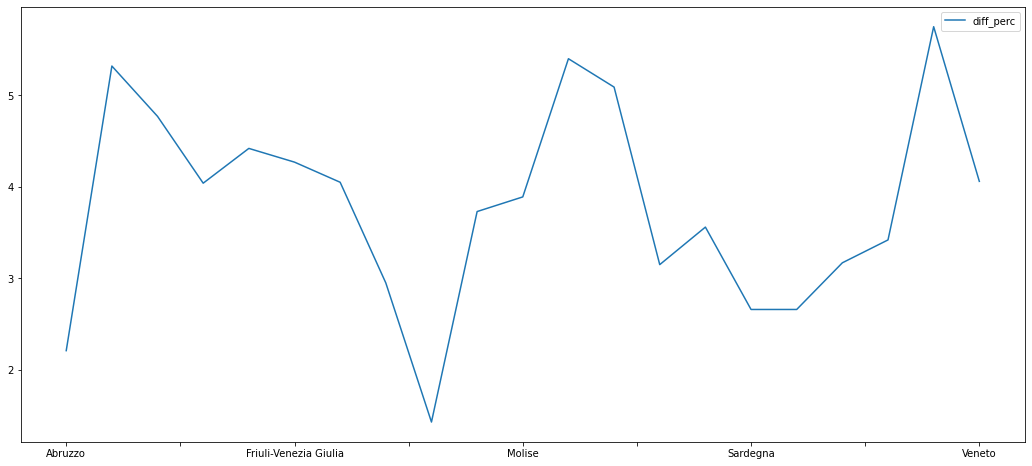

In [25]:
fig, ax = plt.subplots(figsize =(18, 8))
df_join.plot(y = 'diff_perc', ax= ax)
plt.show()

# Prendo stesse fasce di età
quindi prendo maggiori di 20 anni 

In [26]:
df_platea[df_platea['nome_area'] == 'Abruzzo']

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
5,ABR,Abruzzo,50-59,208686
6,ABR,Abruzzo,60-69,171793
7,ABR,Abruzzo,70-79,137406
8,ABR,Abruzzo,80+,116953


In [27]:
df_popolazione[df_popolazione['denominazione_regione'] == 'Abruzzo']

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
0,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,0-15,87423,82474,169897
1,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,16-19,24402,22349,46751
2,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,20-29,67472,62611,130083
3,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,30-39,76472,74241,150713
4,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,40-49,94745,95315,190060
5,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,50-59,100048,104109,204157
6,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,60-69,80545,87160,167705
7,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,70-79,60810,69762,130572
8,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,80-89,34181,50307,84488
9,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,90+,5645,13870,19515


In [28]:
'ciao' not in [3,4,5, 'ciao']

False

In [29]:
df_platea_20 = df_platea[(df_platea['fascia_anagrafica'] != '05-11') & (df_platea['fascia_anagrafica'] != '12-19')]

In [30]:
df_platea_20[df_platea_20['nome_area'] == 'Abruzzo']

,area,nome_area,fascia_anagrafica,totale_popolazione
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
5,ABR,Abruzzo,50-59,208686
6,ABR,Abruzzo,60-69,171793
7,ABR,Abruzzo,70-79,137406
8,ABR,Abruzzo,80+,116953


In [31]:
df_popolazione.head(2)

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
0,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,0-15,87423,82474,169897
1,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,16-19,24402,22349,46751


In [32]:
df_popolazione_20 = df_popolazione[(df_popolazione['range_eta'] != '0-15') & (df_popolazione['range_eta'] != '16-19')]
df_popolazione_20

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
2,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,20-29,67472,62611,130083
3,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,30-39,76472,74241,150713
4,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,40-49,94745,95315,190060
5,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,50-59,100048,104109,204157
6,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,60-69,80545,87160,167705
...,...,...,...,...,...,...,...,...,...,...,...,...
205,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,50-59,399024,400436,799460
206,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,60-69,293238,309972,603210
207,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,70-79,228669,265774,494443
208,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,80-89,115439,177591,293030


In [33]:
df_popolazione_20[df_popolazione_20['denominazione_regione'] == 'Abruzzo']

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
2,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,20-29,67472,62611,130083
3,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,30-39,76472,74241,150713
4,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,40-49,94745,95315,190060
5,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,50-59,100048,104109,204157
6,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,60-69,80545,87160,167705
7,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,70-79,60810,69762,130572
8,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,80-89,34181,50307,84488
9,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,90+,5645,13870,19515


In [34]:
set(df_popolazione_20['denominazione_regione']) ^ set(df_platea_20['nome_area'])

set()

In [35]:
df_platea_20_tot = df_platea_20.groupby(["area", "nome_area"]).sum().reset_index()
df_platea_20_tot

,area,nome_area,totale_popolazione
0,ABR,Abruzzo,1094195
1,BAS,Basilicata,453934
2,CAL,Calabria,1542307
3,CAM,Campania,4598277
4,EMR,Emilia-Romagna,3670761
5,FVG,Friuli-Venezia Giulia,1002587
6,LAZ,Lazio,4716312
7,LIG,Liguria,1295399
8,LOM,Lombardia,8452318
9,MAR,Marche,1253418


In [36]:
df_popolazione_20_tot = df_popolazione_20.groupby(["codice_regione", "sigla_regione", "denominazione_regione"])[["totale_generale"]]\
                    .sum().reset_index()
df_popolazione_20_tot

,codice_regione,sigla_regione,denominazione_regione,totale_generale
0,1,PIE,Piemonte,3594047
1,2,VDA,Valle d'Aosta,103069
2,3,LOM,Lombardia,8210507
3,5,VEN,Veneto,4011772
4,6,FVG,Friuli-Venezia Giulia,1010431
5,7,LIG,Liguria,1293758
6,8,EMR,Emilia-Romagna,3688003
7,9,TOS,Toscana,3079001
8,10,UMB,Umbria,725102
9,11,MAR,Marche,1256242


In [37]:
df_popolazione_20_def = df_popolazione_20_tot[['denominazione_regione', 'totale_generale']].set_index('denominazione_regione')
df_popolazione_20_def.rename(columns = {'totale_generale': 'totale_popolazione'}, inplace= True)
df_popolazione_20_def

,totale_popolazione
denominazione_regione,
Piemonte,3594047
Valle d'Aosta,103069
Lombardia,8210507
Veneto,4011772
Friuli-Venezia Giulia,1010431
Liguria,1293758
Emilia-Romagna,3688003
Toscana,3079001
Umbria,725102


In [38]:
df_platea_20_def = df_platea_20_tot[['nome_area', 'totale_popolazione']].set_index('nome_area')
df_platea_20_def.rename(columns={'totale_popolazione':'totale_platea'}, inplace= True)
df_platea_20_def

,totale_platea
nome_area,
Abruzzo,1094195
Basilicata,453934
Calabria,1542307
Campania,4598277
Emilia-Romagna,3670761
Friuli-Venezia Giulia,1002587
Lazio,4716312
Liguria,1295399
Lombardia,8452318


In [39]:
df_join_20 = df_platea_20_def.join(df_popolazione_20_def, how = 'inner')
df_join_20

,totale_platea,totale_popolazione
Abruzzo,1094195,1077293
Basilicata,453934,461228
Calabria,1542307,1550979
Campania,4598277,4572582
Emilia-Romagna,3670761,3688003
Friuli-Venezia Giulia,1002587,1010431
Lazio,4716312,4736028
Liguria,1295399,1293758
Lombardia,8452318,8210507
Marche,1253418,1256242


In [40]:
df_join_20.loc[:, 'diff_tot'] = df_join_20['totale_popolazione'] - df_join_20['totale_platea']
df_join_20

,totale_platea,totale_popolazione,diff_tot
Abruzzo,1094195,1077293,-16902
Basilicata,453934,461228,7294
Calabria,1542307,1550979,8672
Campania,4598277,4572582,-25695
Emilia-Romagna,3670761,3688003,17242
Friuli-Venezia Giulia,1002587,1010431,7844
Lazio,4716312,4736028,19716
Liguria,1295399,1293758,-1641
Lombardia,8452318,8210507,-241811
Marche,1253418,1256242,2824


In [41]:
df_join_20.loc[:, 'diff_perc'] = round(100*(df_join_20['totale_popolazione'] - df_join_20['totale_platea']) / df_join_20['totale_popolazione'], 2)
df_join_20

,totale_platea,totale_popolazione,diff_tot,diff_perc
Abruzzo,1094195,1077293,-16902,-1.57
Basilicata,453934,461228,7294,1.58
Calabria,1542307,1550979,8672,0.56
Campania,4598277,4572582,-25695,-0.56
Emilia-Romagna,3670761,3688003,17242,0.47
Friuli-Venezia Giulia,1002587,1010431,7844,0.78
Lazio,4716312,4736028,19716,0.42
Liguria,1295399,1293758,-1641,-0.13
Lombardia,8452318,8210507,-241811,-2.95
Marche,1253418,1256242,2824,0.22


In [42]:


df_join

,totale_platea,totale_popolazione,diff_tot,diff_perc
Abruzzo,1265353,1293941,28588,2.21
Basilicata,523836,553254,29418,5.32
Calabria,1803821,1894110,90289,4.77
Campania,5481138,5712143,231005,4.04
Emilia-Romagna,4266930,4464119,197189,4.42
Friuli-Venezia Giulia,1154702,1206216,51514,4.27
Lazio,5522780,5755700,232920,4.05
Liguria,1479768,1524826,45058,2.95
Lombardia,9883969,10027602,143633,1.43
Marche,1456240,1512672,56432,3.73


In [43]:
df_join_20

,totale_platea,totale_popolazione,diff_tot,diff_perc
Abruzzo,1094195,1077293,-16902,-1.57
Basilicata,453934,461228,7294,1.58
Calabria,1542307,1550979,8672,0.56
Campania,4598277,4572582,-25695,-0.56
Emilia-Romagna,3670761,3688003,17242,0.47
Friuli-Venezia Giulia,1002587,1010431,7844,0.78
Lazio,4716312,4736028,19716,0.42
Liguria,1295399,1293758,-1641,-0.13
Lombardia,8452318,8210507,-241811,-2.95
Marche,1253418,1256242,2824,0.22
